In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('_mpl-gallery')

In [2]:
incidents = pd.read_csv("incident.csv", encoding="utf-8", encoding_errors='ignore')
incidents.ndim

2

In [3]:
incidents["opened_at"] = pd.to_datetime(incidents["opened_at"]).dt.date
incidents.set_index("opened_at", inplace=True)
incidents.index = pd.to_datetime(incidents.index, format="%Y-%M-%d")

In [4]:
incidents.head()
print('')
incidents.tail()

,number,short_description,caller_id,priority,u_cause_code,u_cause_source,cmdb_ci,description,u_markets,calendar_stc
opened_at,,,,,,,,,,
2025-05-30,INC0168301,Iqos Facebook account from Canada is not showi...,Juan Valencia,3 - Moderate,NaN,NaN,Sprinklr,Sprinklr is not showing the correct post to ma...,Canada,NaN
2025-06-03,INC0168725,I don't have access to sprinklr after i reques...,Mattia Vesperini,3 - Moderate,NaN,NaN,Sprinklr,"After clic PMI SINGLE ON, i can't have access",Poland,NaN
2025-06-03,INC0168731,Request to Update NPS Survey Link Logic,Stephanie Debs,2 - High,NaN,NaN,Sprinklr,"Hello,\r\n\r\nFollowing a chat session on the ...",Lebanon,NaN
2025-06-03,INC0168752,Sprinklr Data not visible in dashboard,Ariane Buchli,4 - Low,NaN,NaN,Sprinklr,"Hi, I wanted to flag an issue we've encountere...",Switzerland,NaN
2025-06-03,INC0168836,Link in Instagram Bio doesn't work,Teodora Orestijevic,3 - Moderate,NaN,NaN,Social Account,I raised a ticket RITM0216582 a few days ago t...,Montenegro,NaN


In [5]:
incidents.isna().sum()

number                  0
short_description       0
caller_id               0
priority                0
u_cause_code         1495
u_cause_source       1495
cmdb_ci                 0
description            27
u_markets               0
calendar_stc           23
dtype: int64

In [6]:
incidents["u_cause_code"] = incidents["u_cause_code"].fillna("Not Applicable")
incidents["u_cause_source"] = incidents["u_cause_source"].fillna("Not Applicable")
incidents["description"] = incidents["description"].fillna("No Description")

In [7]:
incidents.drop("calendar_stc", axis=1, inplace=True)

In [8]:
incidents.isna().sum()

number               0
short_description    0
caller_id            0
priority             0
u_cause_code         0
u_cause_source       0
cmdb_ci              0
description          0
u_markets            0
dtype: int64

In [9]:
# Reporter names
incidents["caller_id"].unique()[:50]

array(['Nicolas Morales', 'Aldana Etcheves Miciolino',
       'Benjamin Le Trequesser', 'Anna Liljeback', 'Claudia Battaglino',
       'Anastasia Casian', 'Mariana Arsova', 'Florian Bogner',
       'Yasemin Karakas', 'Nataly Trister Ben Zeev', 'Jehad Al-Shanti',
       'Ina Vicol', 'Pia Diettrich', 'Kristyna Farkas', 'Goras Andrei',
       'Dang Ngoc Chau Thai', 'Frederik Gergely', 'Mafalda Monteiro',
       'Fran Ivankovic', 'Lisa Marie Broekaert', 'Petros Gkouskos',
       'Erjona Mataj', 'Ayu Nagata', 'Maya El Saify',
       'Natalija Simeunovic', 'Petyo Petkov', 'Vladimir Popovic',
       'Martin Rembecki', 'Dimitra Skitsa', 'Farah Nafi',
       'Karessa Alexandra Baritua', 'Mark Anthony Agustin',
       'Walaipun Leethanachai', 'Ana Praxedes', 'Anais Sidler-Poinas',
       'Mariia Mytso', 'Theofanis Aritzis', 'Rima Kharatyan',
       'Mariana Carvalho', 'Verena Schoenol', 'Andrew Turner',
       'Serena Di Filippo', 'Daniele Pitrelli', 'Adelina Chiru',
       'Valentina Botnari', 

In [10]:
len(incidents["caller_id"].unique())

520

In [11]:
# Sorted incident raised by reporter
print(incidents["caller_id"].value_counts()[:10])

caller_id
Frosina Dimkovska    75
Simona Katsanos      38
Giacomo Disabato     37
Adelina Chiru        37
Qazim CSC Kamberi    35
Anum Baig            34
Farah Nafi           30
Georgel Chiabei      28
Mariana Sandler      27
Stanislaw Wilk       27
Name: count, dtype: int64


In [12]:
for year in incidents.index.year.unique():
    print('')
    print(year)
    print(incidents[incidents.index.year==year]["caller_id"].value_counts()[:10])


2020
caller_id
Pia Diettrich         11
Mafalda Monteiro      10
Frederik Gergely       6
Yasemin Karakas        6
Goras Andrei           5
Maya El Saify          5
Florian Bogner         4
Mariana Arsova         4
Anna Liljeback         3
Claudia Battaglino     3
Name: count, dtype: int64

2021
caller_id
Adelina Chiru             36
Farah Nafi                19
Ana Martins               15
Tatiana Berezhnaya        12
Florian Bogner            10
Enrico Tezza              10
Hristo Genchev             8
Benjamin Le Trequesser     8
Anna Liljeback             7
Stanislaw Wilk             7
Name: count, dtype: int64

2022
caller_id
Frosina Dimkovska      32
Simona Katsanos        22
Dusan Reves            22
Hristo Genchev         15
Stanislaw Wilk         13
Assel Soltanbayeva     12
Hasianti Lumbanraja    12
Haytham Mostapha       11
Farah Nafi             10
Veronika Stavrova       9
Name: count, dtype: int64

2023
caller_id
Frosina Dimkovska    29
Giacomo Disabato     24
Mariana Sa

In [13]:
# helper function to plot horizontal bars

def plot_hbars(col_name, color):
    """
    Plots horizontal bars for categorical columns.
    """
    fig, ax = plt.subplots(2, 3, figsize=(15, 5))

    years = [2020, 2021, 2022, 2023, 2024, 2025]
    
    index=0
    for row in range(2):
        for col in range(3):
            incidents[incidents.index.year==years[index]][f"{col_name}"].value_counts(ascending=False)[:10].plot(kind='barh', ax=ax[row,col],
                                                                                                                 ylabel='', alpha=0.8, color=color)
            #ax[row,col].set_xlabel('')
            ax[row,col].set_title(years[index], size=10)
            index += 1
    
        sns.despine()
    plt.tight_layout()
    plt.show()

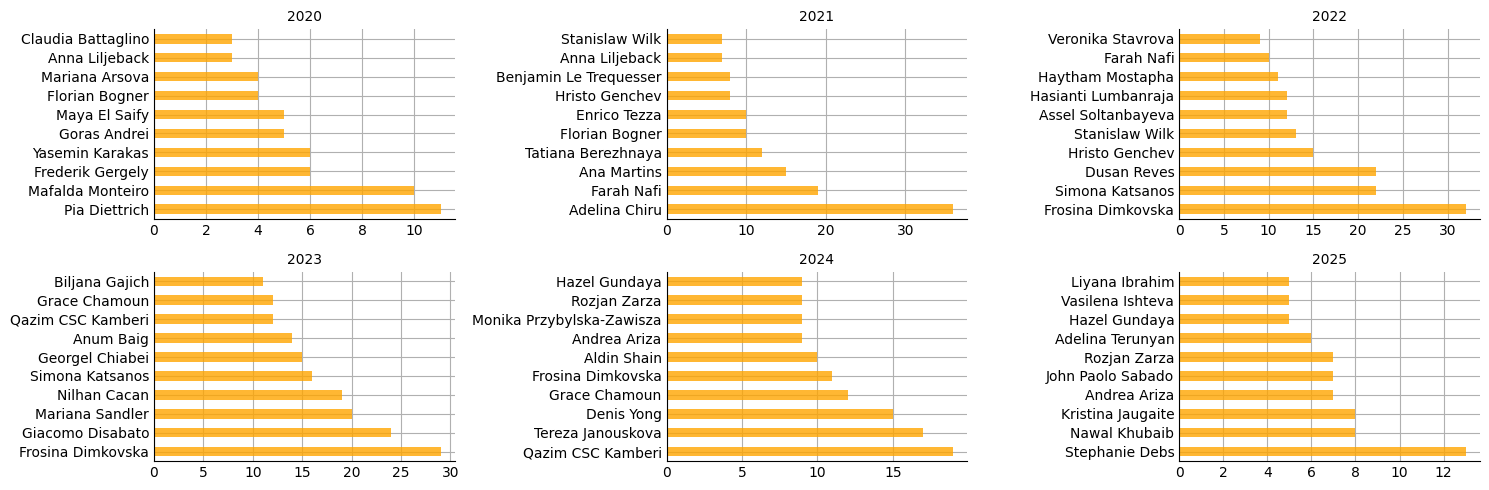

In [14]:
plot_hbars("caller_id", "orange")

In [15]:
years = [2020, 2021, 2022, 2023, 2024, 2025]

def plot_pie_charts(colname):
    """
    Plots pie charts for each year on specified columns.
    """
    fig, ax = plt.subplots(3, 2, figsize=(10, 10), subplot_kw=dict(aspect='equal'))
    index = 0
    
    for row in range(3):
        for col in range(2):
            ax[row,col].set_title(years[index], size=10)
            wedges, text, pct = ax[row, col].pie(incidents[incidents.index.year==years[index]][f"{colname}"].value_counts()[:5],
                                                        autopct="%.1f%%",
                                                        wedgeprops=dict(width=0.5),
                                                        startangle=0,
                                                        pctdistance=0.8,
                                                        colors=sns.set_palette('tab10', len(incidents[incidents.index.year==years[index]][f"{colname}"].value_counts()[:5])),
                                                        textprops=dict(color='w', fontfamily='sans-serif', fontsize=8, fontweight='bold'))
            
            bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.5)
            kw = dict(arrowprops=dict(arrowstyle="-"),
                              bbox=bbox_props, zorder=0, va="center")

            for i, p in enumerate(wedges):
                ang = (p.theta2 - p.theta1)/2. + p.theta1
                if np.isclose(ang % 90, 0):
                    ang += 1e-4  # A very small angle in degrees

                y = np.sin(np.deg2rad(ang))
                x = np.cos(np.deg2rad(ang))
                hor_align = {-1: "right", 1: "left"}[int(np.sign(x))]
                conn_style = "angle, angleA=0, angleB={}".format(ang)
                kw["arrowprops"].update({"connectionstyle": conn_style})
                ax[row,col].annotate(incidents[incidents.index.year==years[index]][f"{colname}"].value_counts()[:5].index[i],
                                                xy=(x, y),
                                                xytext=(1.35 * np.sign(x), 1.3 * y),
                                                horizontalalignment=hor_align,
                                                fontfamily='sans-serif',
                                                fontsize=8, **kw)
            
            index += 1

    plt.show()

In [16]:
incidents.columns

Index(['number', 'short_description', 'caller_id', 'priority', 'u_cause_code',
       'u_cause_source', 'cmdb_ci', 'description', 'u_markets'],
      dtype='object')

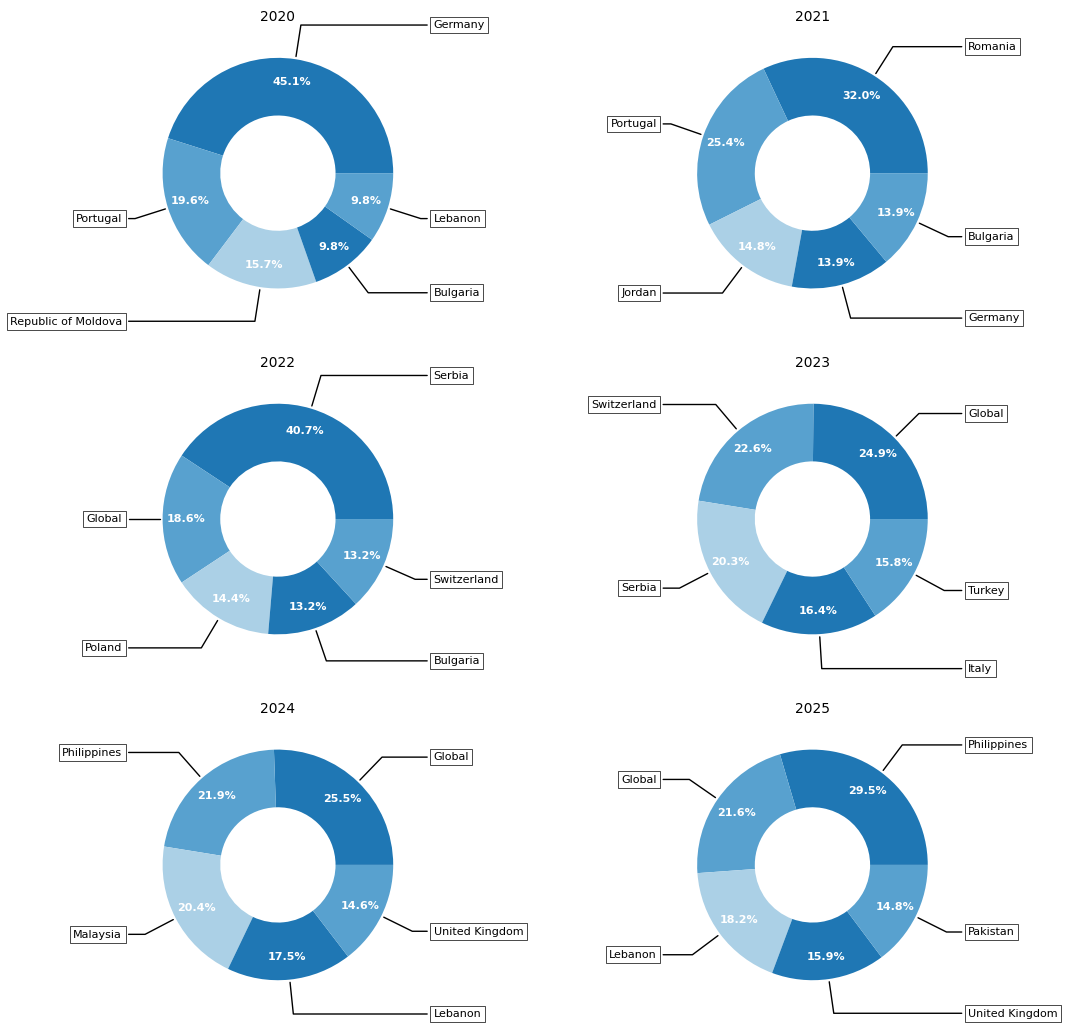

In [17]:
# Pie chart for markets for each year
plot_pie_charts("u_markets")

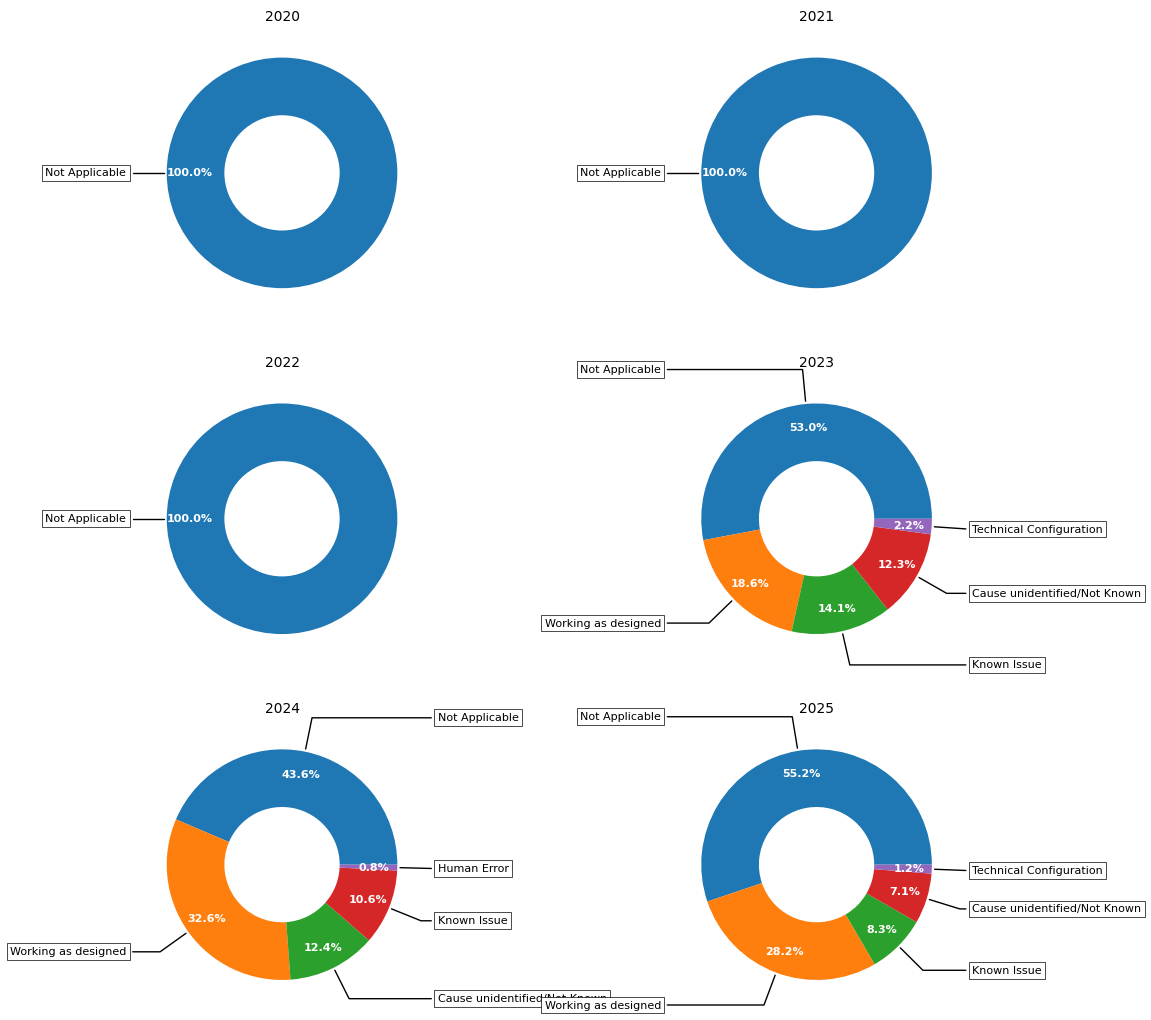

In [18]:
plot_pie_charts("u_cause_code")

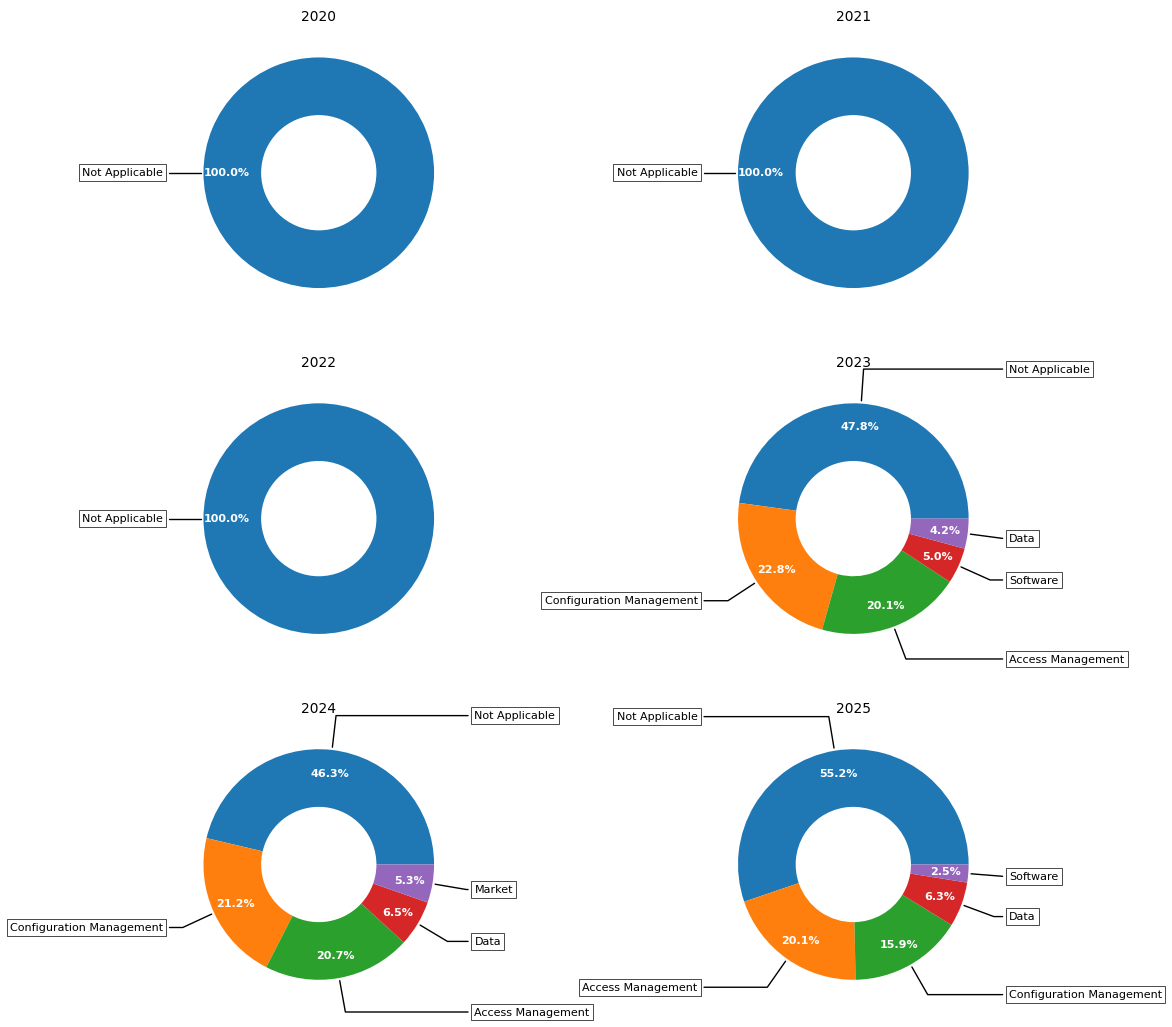

In [19]:
plot_pie_charts("u_cause_source")

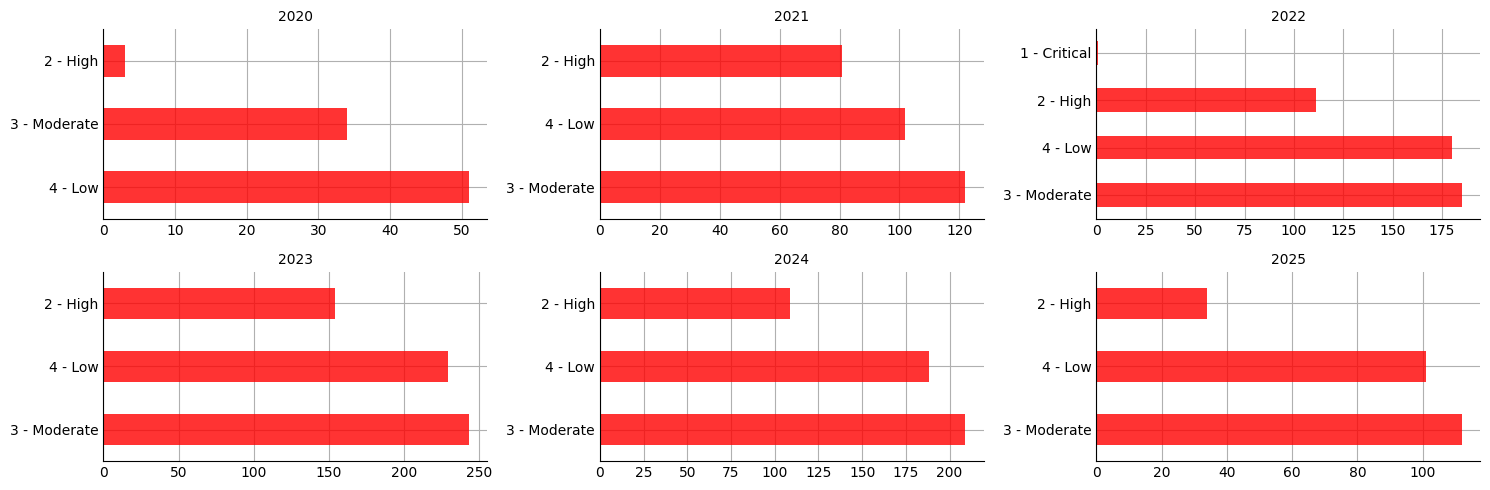

In [20]:
plot_hbars("priority", color="red")

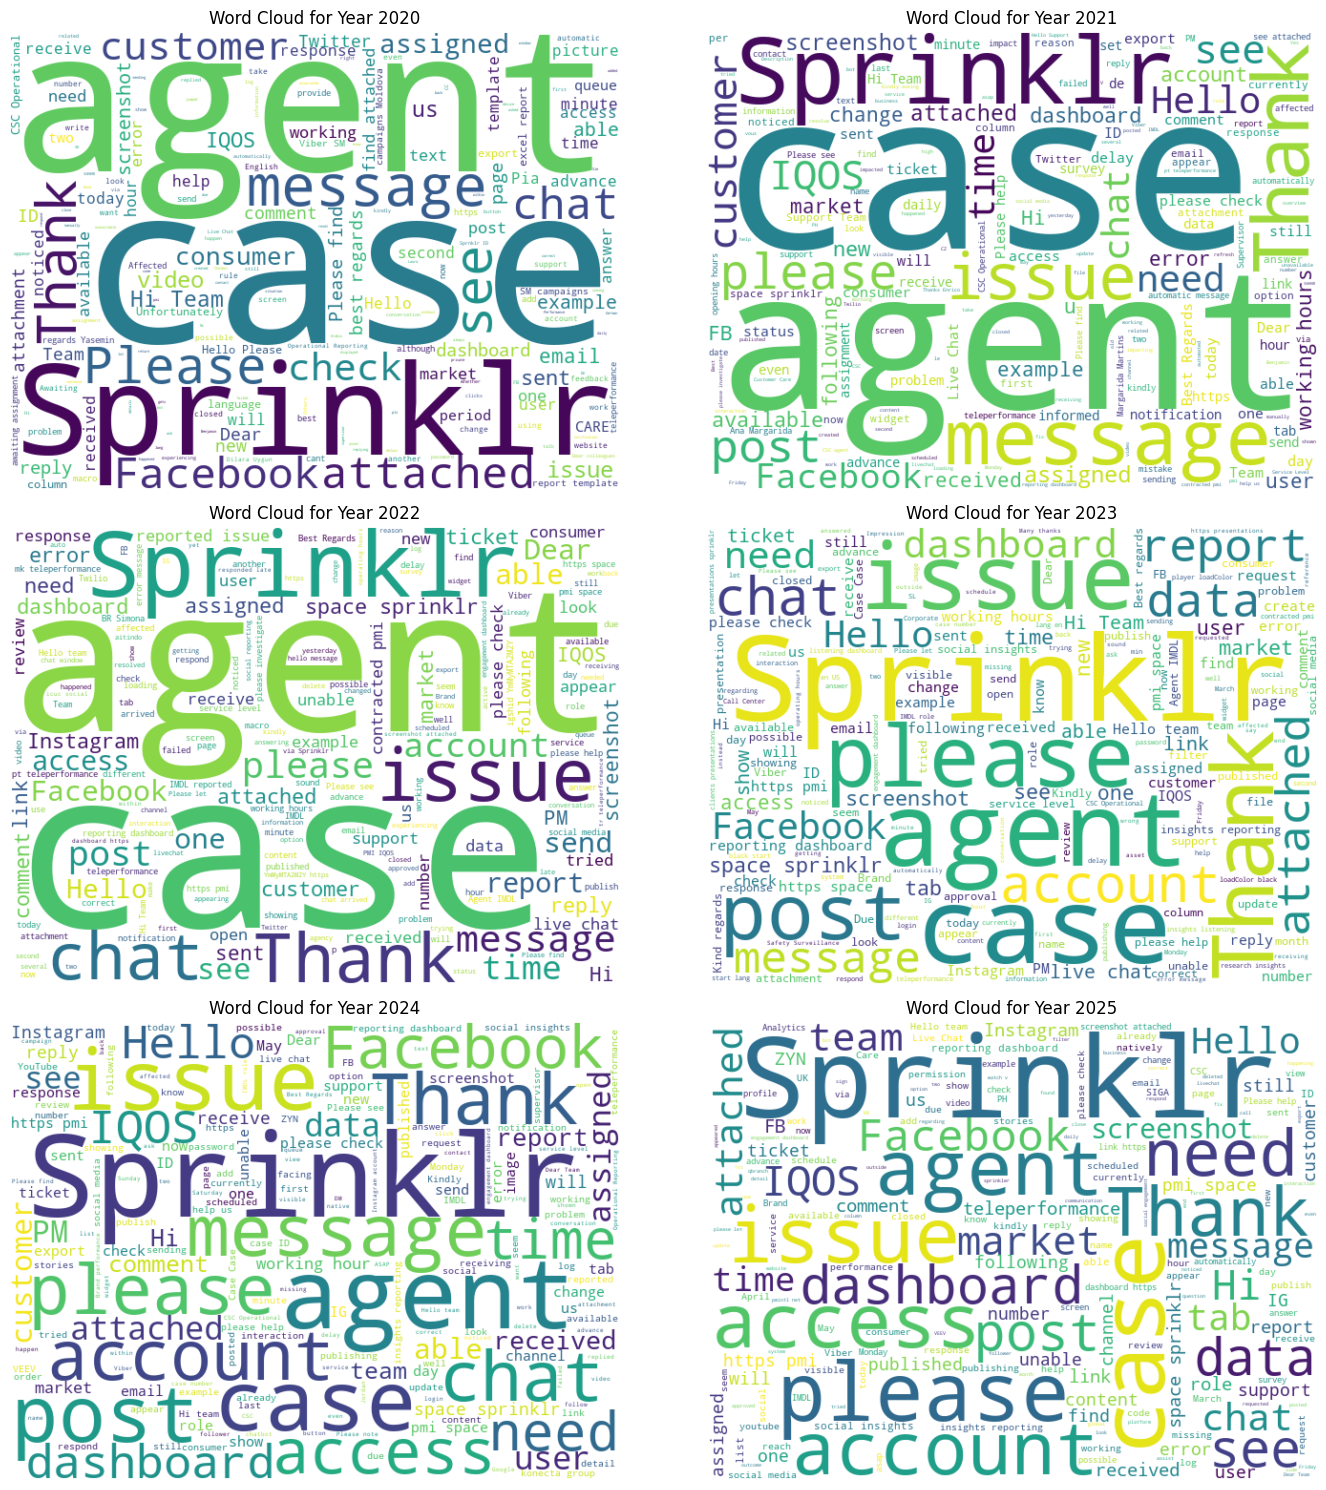

In [21]:
from wordcloud import WordCloud

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

index = 0

for row in range(3):
    for col in range(2):
        # Filter data for the specific year
        year_data = incidents[incidents.index.year == years[index]]
        
        # Combine all incident descriptions for the year into a single string
        text = ' '.join(year_data['description'])
        
        # Generate word cloud
        wordcloud = WordCloud(width=640, height=480, background_color='white').generate(text)
        
        # Display the word cloud
        #plt.figure(figsize=(10, 5))
        ax[row,col].imshow(wordcloud, interpolation='bilinear')
        ax[row,col].axis('off')
        ax[row,col].set_title(f'Word Cloud for Year {years[index]}')
        index += 1

plt.tight_layout()
plt.show()

In [22]:
from collections import Counter
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

for year in years:
    # Combine all text
    all_text = ' '.join(incidents[incidents.index.year==year]['short_description'].dropna().astype(str))
    
    # Clean and tokenize
    all_text = re.sub(r'[^\w\s]', '', all_text.lower())
    words = all_text.split()
    
    # Remove stopwords and single characters
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS and len(word) > 1 and word != 'sprinklr']
    
    # Count frequencies
    word_freq = Counter(filtered_words)
    top_keywords = word_freq.most_common(10)

    print(year)
    print(top_keywords)
    print('')


2020
[('facebook', 14), ('agent', 10), ('cases', 10), ('messages', 8), ('data', 8), ('case', 7), ('sent', 6), ('issue', 6), ('chat', 5), ('working', 4)]

2021
[('issue', 48), ('chat', 31), ('message', 26), ('hours', 25), ('cases', 24), ('facebook', 24), ('agent', 19), ('agents', 19), ('technical', 18), ('access', 17)]

2022
[('issue', 72), ('chat', 56), ('message', 41), ('cases', 40), ('facebook', 34), ('agent', 26), ('agents', 24), ('request', 24), ('case', 23), ('unable', 22)]

2023
[('chat', 66), ('agent', 64), ('issue', 56), ('data', 54), ('facebook', 49), ('dashboard', 47), ('report', 43), ('access', 43), ('account', 41), ('cases', 36)]

2024
[('access', 47), ('post', 39), ('dashboard', 37), ('issue', 37), ('chat', 35), ('account', 35), ('agent', 33), ('instagram', 33), ('facebook', 32), ('cases', 28)]

2025
[('access', 40), ('dashboard', 26), ('issue', 25), ('facebook', 25), ('data', 22), ('account', 17), ('instagram', 16), ('unable', 14), ('agent', 13), ('zyn', 13)]



In [24]:
def extract_keyword(text):
    text = re.sub(r"[^\w\s]", '', text.lower())
    words = text.split()
    keywords = [word for word in words if word not in ENGLISH_STOP_WORDS and len(word)>1 and word != 'sprinklr']
    return keywords

incidents["short_description"].apply(extract_keyword).apply(lambda x: ' '.join(x))

opened_at
2020-08-14    agent cristinasalgadoconcentrixcom able work tool
2020-09-28        request info macro cc 01 ask age verify italy
2020-09-28                            automated exports working
2020-09-30                          chat getting directly agent
2020-09-30                                working messages sent
                                    ...                        
2025-05-30    iqos facebook account canada showing posts mar...
2025-06-03                 dont access requested correct access
2025-06-03                 request update nps survey link logic
2025-06-03                               data visible dashboard
2025-06-03                       link instagram bio doesnt work
Name: short_description, Length: 2249, dtype: object

In [27]:
#Store a separate df with dates and descriptions

dates = incidents.index
keywords = incidents["short_description"].apply(extract_keyword).apply(lambda x: ' '.join(x))


l2_inc_kw = pd.DataFrame({"Date": dates,
                         "KeyWord": keywords.values})
l2_inc_kw.head()

,Date,KeyWord
0,2020-08-14,agent cristinasalgadoconcentrixcom able work tool
1,2020-09-28,request info macro cc 01 ask age verify italy
2,2020-09-28,automated exports working
3,2020-09-30,chat getting directly agent
4,2020-09-30,working messages sent


In [30]:
l2_inc_kw.groupby(l2_inc_kw.Date.dt.month)["KeyWord"].value_counts()[:10]

Date  KeyWord                                     
1     access dashboard                                3
      access                                          2
      download presentation info change               2
      publishing data reflection comment push         2
      2024 report                                     1
      acces trinidad tobagos engagement dashboards    1
      access additional workspaces                    1
      access deactivated                              1
      access gcsm overview_cdm dashboard              1
      access listening dashboards                     1
Name: count, dtype: int64